In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

# Load and preprocess the data
data = pd.read_csv("merged_datasets.csv",header="infer")
data = data.drop(columns=["HUMAN PLAYER POSITION (X) metres","HUMAN PLAYER POSITION (Y) metres","INITITAL VELOCITY OF SHUTTELCOCK(m/s)","INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)","SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)","OUT_OF_COURT_SHOTS"])
data = data.rename(columns={"SHUTTLECOCK POSITIION IN AIR(X ) metres":"X","SHUTTLECOCK POSITIION IN AIR(Y) metres":"Y","SHUTTLECOCK POSITIION IN AIR(Z) metres":"Z"})

numShots = data["SHOT_ID"].max()
print(numShots)
trainsetSize = int(numShots*0.7)
print(trainsetSize)
testsetSize = numShots-trainsetSize
traindata = data.loc[data["SHOT_ID"]<= trainsetSize]
testdata = data.loc[data["SHOT_ID"] > trainsetSize]
print(traindata.head())
print(testdata.head())

scale = MinMaxScaler()
traindata[["X","Y","Z"]] = scale.fit_transform(traindata[["X","Y","Z"]])
testdata[["X","Y","Z"]] = scale.fit_transform(testdata[["X","Y","Z"]])
print(traindata.head())
print(testdata.head())

def prepare_data(data, sequence_length):
    X = []
    Y = []
    for shot_id in data['SHOT_ID'].unique():
        shot_data = data.loc[data['SHOT_ID'] == shot_id][['X', 'Y', 'Z']].values
        for i in range(len(shot_data) - sequence_length):
            sequence = shot_data[i:i+sequence_length]
            X.append(sequence)
            Y.append(shot_data[i+sequence_length])
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

sequence_length =15
X_train, Y_train = prepare_data(traindata, sequence_length)
print(X_train.dtype,Y_train.dtype)

X_test, Y_test = prepare_data(testdata, sequence_length)
print(X_test)

# Reshape the input data to a 2D array for RandomForestRegressor
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

# Create a Random Forest Regressor
rfModel = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rfModel.fit(X_train, Y_train)

# Make predictions
Y_pred = rfModel.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


520
364
   SHOT_ID         X    Y         Z
0        1  4.049659  1.0  1.685961
1        1  4.100141  1.0  1.770894
2        1  4.147209  1.0  1.852351
3        1  4.197915  1.0  1.935086
4        1  4.246229  1.0  2.013513
       SHOT_ID         X    Y         Z
39158      365  4.049659  1.0  1.685961
39159      365  4.100141  1.0  1.770894
39160      365  4.147209  1.0  1.852351
39161      365  4.197915  1.0  1.935086
39162      365  4.246229  1.0  2.013513
   SHOT_ID         X    Y         Z
0        1  0.000504  0.0  0.220637
1        1  0.009904  0.0  0.232411
2        1  0.018668  0.0  0.243703
3        1  0.028110  0.0  0.255173
4        1  0.037106  0.0  0.266045
       SHOT_ID         X    Y         Z
39158      365  0.000551  0.0  0.298339
39159      365  0.010839  0.0  0.314260
39160      365  0.020431  0.0  0.329529
39161      365  0.030764  0.0  0.345037
39162      365  0.040609  0.0  0.359738


C:\Users\xunth\AppData\Local\Temp\ipykernel_34428\149836702.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindata[["X","Y","Z"]] = scale.fit_transform(traindata[["X","Y","Z"]])
C:\Users\xunth\AppData\Local\Temp\ipykernel_34428\149836702.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdata[["X","Y","Z"]] = scale.fit_transform(testdata[["X","Y","Z"]])


float64 float64
[[[5.51336957e-04 0.00000000e+00 2.98339438e-01]
  [1.08387225e-02 0.00000000e+00 3.14259981e-01]
  [2.04305833e-02 0.00000000e+00 3.29528828e-01]
  ...
  [1.19147573e-01 0.00000000e+00 4.69819270e-01]
  [1.28418581e-01 0.00000000e+00 4.82669400e-01]
  [1.38044221e-01 0.00000000e+00 4.95188704e-01]]

 [[1.08387225e-02 0.00000000e+00 3.14259981e-01]
  [2.04305833e-02 0.00000000e+00 3.29528828e-01]
  [3.07636196e-02 0.00000000e+00 3.45037286e-01]
  ...
  [1.28418581e-01 0.00000000e+00 4.82669400e-01]
  [1.38044221e-01 0.00000000e+00 4.95188704e-01]
  [1.47556877e-01 0.00000000e+00 5.07229415e-01]]

 [[2.04305833e-02 0.00000000e+00 3.29528828e-01]
  [3.07636196e-02 0.00000000e+00 3.45037286e-01]
  [4.06092089e-02 0.00000000e+00 3.59738402e-01]
  ...
  [1.38044221e-01 0.00000000e+00 4.95188704e-01]
  [1.47556877e-01 0.00000000e+00 5.07229415e-01]
  [1.56828751e-01 0.00000000e+00 5.20054071e-01]]

 ...

 [[9.35876030e-01 7.85882058e-01 5.56180002e-01]
  [9.40054047e-01 7.866

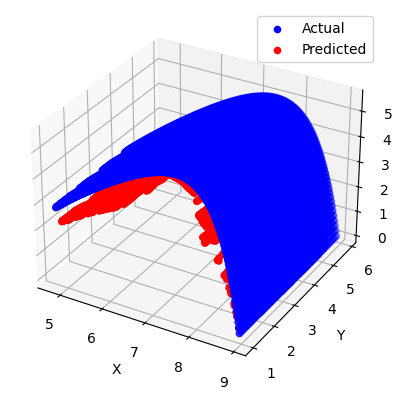

In [2]:
# ... (previous code)

# Make predictions
Y_pred = rfModel.predict(X_test)

# Convert predictions back to original scale for plotting
Y_test_inv = scale.inverse_transform(Y_test)
Y_pred_inv = scale.inverse_transform(Y_pred)

# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(Y_test_inv[:,0], Y_test_inv[:,1], Y_test_inv[:,2], color='b', label='Actual')
ax.scatter(Y_pred_inv[:,0], Y_pred_inv[:,1], Y_pred_inv[:,2], color='r',label='Predicted')
plt.legend()
plt.show()